In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.2.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

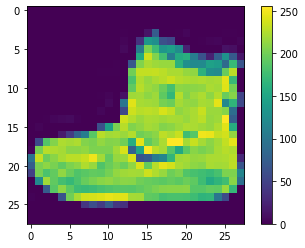

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

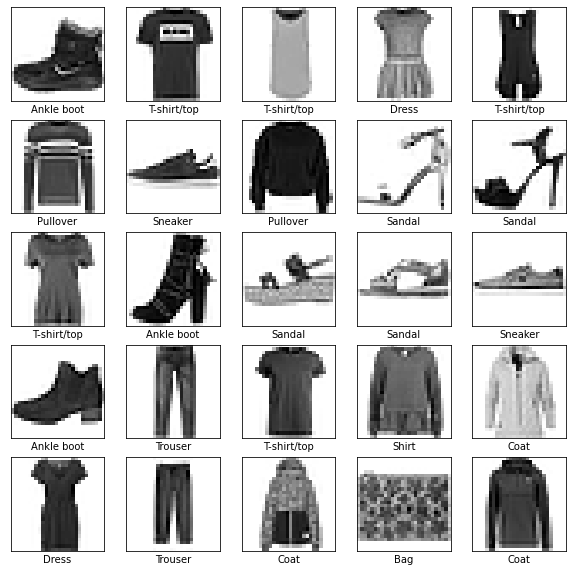

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)

In [21]:
y = tf.keras.layers.Conv2D(2, 3, activation='relu', input_shape=input_shape)(x)

In [23]:
y.shape

TensorShape([4, 26, 26, 2])

In [24]:
y = tf.keras.layers.Conv2D(
... 2, 3, activation='relu', dilation_rate=2, input_shape=input_shape)(x)

In [25]:
y.shape

TensorShape([4, 24, 24, 2])

In [40]:
y = tf.keras.layers.Conv2D(
... 50, 12, activation='relu', padding="same", input_shape=input_shape)(x)

In [41]:
y.shape

TensorShape([4, 28, 28, 50])

In [28]:
input_shape = (2, 3)
x = tf.random.normal(input_shape)

In [30]:
x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.869798  , -0.3076541 , -0.5899827 ],
       [-0.22384885,  0.5129462 ,  0.8063406 ]], dtype=float32)>

In [42]:
inputs = tf.keras.Input(shape=(10, 128, 128, 3))

In [43]:
conv_2d_layer = tf.keras.layers.Conv2D(64, (3, 3))

In [44]:
outputs = tf.keras.layers.TimeDistributed(conv_2d_layer)(inputs)

In [45]:
outputs.shape

TensorShape([None, 10, 126, 126, 64])

In [49]:
from numpy import array
length = 5
seq = array([i/float(length) for i in range(length)])
print(seq)

[0.  0.2 0.4 0.6 0.8]


In [50]:
X = seq.reshape(5, 1, 1)
y = seq.reshape(5, 1)

In [72]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# prepare sequence
length = 5
seq = array([i/float(length) for i in range(length)])
X = seq.reshape(len(seq), 1, 1)
y = seq.reshape(len(seq), 1)
# define LSTM configuration
n_neurons = length
n_batch = length
n_epoch = 1000
# create LSTM
model = Sequential()
model.add(LSTM(n_neurons, input_dim=1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
# train LSTM
model.fit(X, y, epochs=n_epoch, batch_size=n_batch, verbose=2)
# evaluate
result = model.predict(X, batch_size=n_batch, verbose=0)
for value in result:
	print('%.1f' % value)

/Users/tanishq/anaconda3/envs/mlenv/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  app.launch_new_instance()
/Users/tanishq/anaconda3/envs/mlenv/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(5, input_shape=(None, 1))`
  app.launch_new_instance()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 5)                 140       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 - 1s - loss: 0.2388
Epoch 2/1000
 - 0s - loss: 0.2374
Epoch 3/1000
 - 0s - loss: 0.2358
Epoch 4/1000
 - 0s - loss: 0.2342
Epoch 5/1000
 - 0s - loss: 0.2325
Epoch 6/1000
 - 0s - loss: 0.2306
Epoch 7/1000
 - 0s - loss: 0.2289
Epoch 8/1000
 - 0s - loss: 0.2271
Epoch 9/1000
 - 0s - loss: 0.2254
Epoch 10/1000
 - 0s - loss: 0.2236
Epoch 11/1000
 - 0s - loss: 0.2218
Epoch 12/1000
 - 0s - loss: 0.2201
Epoch 13/1000
 - 0s - loss: 0.2183
Epoch 14/1000
 - 0s - loss: 0.2166
Epoch 15/1000
 - 0s - loss: 0.21

 - 0s - loss: 0.0499
Epoch 215/1000
 - 0s - loss: 0.0497
Epoch 216/1000
 - 0s - loss: 0.0495
Epoch 217/1000
 - 0s - loss: 0.0493
Epoch 218/1000
 - 0s - loss: 0.0490
Epoch 219/1000
 - 0s - loss: 0.0488
Epoch 220/1000
 - 0s - loss: 0.0486
Epoch 221/1000
 - 0s - loss: 0.0484
Epoch 222/1000
 - 0s - loss: 0.0482
Epoch 223/1000
 - 0s - loss: 0.0480
Epoch 224/1000
 - 0s - loss: 0.0478
Epoch 225/1000
 - 0s - loss: 0.0476
Epoch 226/1000
 - 0s - loss: 0.0474
Epoch 227/1000
 - 0s - loss: 0.0472
Epoch 228/1000
 - 0s - loss: 0.0470
Epoch 229/1000
 - 0s - loss: 0.0468
Epoch 230/1000
 - 0s - loss: 0.0466
Epoch 231/1000
 - 0s - loss: 0.0465
Epoch 232/1000
 - 0s - loss: 0.0463
Epoch 233/1000
 - 0s - loss: 0.0461
Epoch 234/1000
 - 0s - loss: 0.0459
Epoch 235/1000
 - 0s - loss: 0.0457
Epoch 236/1000
 - 0s - loss: 0.0456
Epoch 237/1000
 - 0s - loss: 0.0454
Epoch 238/1000
 - 0s - loss: 0.0452
Epoch 239/1000
 - 0s - loss: 0.0451
Epoch 240/1000
 - 0s - loss: 0.0449
Epoch 241/1000
 - 0s - loss: 0.0447
Epoch 2

Epoch 442/1000
 - 0s - loss: 0.0238
Epoch 443/1000
 - 0s - loss: 0.0237
Epoch 444/1000
 - 0s - loss: 0.0236
Epoch 445/1000
 - 0s - loss: 0.0235
Epoch 446/1000
 - 0s - loss: 0.0234
Epoch 447/1000
 - 0s - loss: 0.0233
Epoch 448/1000
 - 0s - loss: 0.0232
Epoch 449/1000
 - 0s - loss: 0.0231
Epoch 450/1000
 - 0s - loss: 0.0230
Epoch 451/1000
 - 0s - loss: 0.0229
Epoch 452/1000
 - 0s - loss: 0.0228
Epoch 453/1000
 - 0s - loss: 0.0228
Epoch 454/1000
 - 0s - loss: 0.0227
Epoch 455/1000
 - 0s - loss: 0.0226
Epoch 456/1000
 - 0s - loss: 0.0225
Epoch 457/1000
 - 0s - loss: 0.0224
Epoch 458/1000
 - 0s - loss: 0.0223
Epoch 459/1000
 - 0s - loss: 0.0222
Epoch 460/1000
 - 0s - loss: 0.0221
Epoch 461/1000
 - 0s - loss: 0.0220
Epoch 462/1000
 - 0s - loss: 0.0219
Epoch 463/1000
 - 0s - loss: 0.0218
Epoch 464/1000
 - 0s - loss: 0.0217
Epoch 465/1000
 - 0s - loss: 0.0216
Epoch 466/1000
 - 0s - loss: 0.0215
Epoch 467/1000
 - 0s - loss: 0.0214
Epoch 468/1000
 - 0s - loss: 0.0213
Epoch 469/1000
 - 0s - loss:

Epoch 670/1000
 - 0s - loss: 0.0046
Epoch 671/1000
 - 0s - loss: 0.0045
Epoch 672/1000
 - 0s - loss: 0.0045
Epoch 673/1000
 - 0s - loss: 0.0044
Epoch 674/1000
 - 0s - loss: 0.0044
Epoch 675/1000
 - 0s - loss: 0.0043
Epoch 676/1000
 - 0s - loss: 0.0043
Epoch 677/1000
 - 0s - loss: 0.0042
Epoch 678/1000
 - 0s - loss: 0.0042
Epoch 679/1000
 - 0s - loss: 0.0041
Epoch 680/1000
 - 0s - loss: 0.0041
Epoch 681/1000
 - 0s - loss: 0.0040
Epoch 682/1000
 - 0s - loss: 0.0040
Epoch 683/1000
 - 0s - loss: 0.0039
Epoch 684/1000
 - 0s - loss: 0.0039
Epoch 685/1000
 - 0s - loss: 0.0038
Epoch 686/1000
 - 0s - loss: 0.0038
Epoch 687/1000
 - 0s - loss: 0.0037
Epoch 688/1000
 - 0s - loss: 0.0037
Epoch 689/1000
 - 0s - loss: 0.0036
Epoch 690/1000
 - 0s - loss: 0.0036
Epoch 691/1000
 - 0s - loss: 0.0035
Epoch 692/1000
 - 0s - loss: 0.0035
Epoch 693/1000
 - 0s - loss: 0.0034
Epoch 694/1000
 - 0s - loss: 0.0034
Epoch 695/1000
 - 0s - loss: 0.0034
Epoch 696/1000
 - 0s - loss: 0.0033
Epoch 697/1000
 - 0s - loss:

Epoch 886/1000
 - 0s - loss: 1.6102e-04
Epoch 887/1000
 - 0s - loss: 1.5911e-04
Epoch 888/1000
 - 0s - loss: 1.5725e-04
Epoch 889/1000
 - 0s - loss: 1.5542e-04
Epoch 890/1000
 - 0s - loss: 1.5364e-04
Epoch 891/1000
 - 0s - loss: 1.5190e-04
Epoch 892/1000
 - 0s - loss: 1.5021e-04
Epoch 893/1000
 - 0s - loss: 1.4855e-04
Epoch 894/1000
 - 0s - loss: 1.4692e-04
Epoch 895/1000
 - 0s - loss: 1.4534e-04
Epoch 896/1000
 - 0s - loss: 1.4380e-04
Epoch 897/1000
 - 0s - loss: 1.4229e-04
Epoch 898/1000
 - 0s - loss: 1.4081e-04
Epoch 899/1000
 - 0s - loss: 1.3937e-04
Epoch 900/1000
 - 0s - loss: 1.3797e-04
Epoch 901/1000
 - 0s - loss: 1.3659e-04
Epoch 902/1000
 - 0s - loss: 1.3525e-04
Epoch 903/1000
 - 0s - loss: 1.3394e-04
Epoch 904/1000
 - 0s - loss: 1.3267e-04
Epoch 905/1000
 - 0s - loss: 1.3142e-04
Epoch 906/1000
 - 0s - loss: 1.3020e-04
Epoch 907/1000
 - 0s - loss: 1.2901e-04
Epoch 908/1000
 - 0s - loss: 1.2785e-04
Epoch 909/1000
 - 0s - loss: 1.2672e-04
Epoch 910/1000
 - 0s - loss: 1.2562e-04


In [151]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, TimeDistributed, Conv2D,GlobalAveragePooling2D,Dropout,Flatten 
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.convolutional import Conv2D, Conv2DTranspose

In [67]:
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from numpy import array
# define model
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(4, return_sequences = False, return_state = True)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
# define input data
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(model.predict(data))

[array([[-0.06833365,  0.02047256,  0.04903113,  0.03015736]],
      dtype=float32), array([[-0.06833365,  0.02047256,  0.04903113,  0.03015736]],
      dtype=float32), array([[-0.13380115,  0.03882037,  0.10499833,  0.05522604]],
      dtype=float32)]


In [154]:
model = Sequential()
# after having Conv2D...
# model.add(Input=(15,50,50,3))
model.add(
    TimeDistributed(
        Conv2D(128, (7,7), strides = (3,3), padding="same"), 
        input_shape=(15, 50, 50, 3) # 5 images...
    )
)
model.add(
    TimeDistributed(
        BatchNormalization() # Or Flatten()
    )
)
model.add(
    TimeDistributed(
        Activation("relu") # Or Flatten()
    )
)
model.add(
    TimeDistributed(
        Conv2D(64, (5,5), strides = (2,2), padding="same")
    )
)
# We need to have only one dimension per output
# to insert them to the LSTM layer - Flatten or use Pooling
model.add(
    TimeDistributed(
        BatchNormalization() # Or Flatten()
    )
)
model.add(
    TimeDistributed(
        Activation("relu") # Or Flatten()
    )
)
model.add(ConvLSTM2D(64,(3,3), padding="same", return_sequences = True))
model.add(ConvLSTM2D(32,(3,3), padding="same", return_sequences = True))
model.add(ConvLSTM2D(64,(3,3), padding="same", return_sequences = True))
model.add(
    TimeDistributed(
        Conv2DTranspose(128, (5,5), padding="same", strides = (2,2), output_padding=0) # Or Flatten()
    )
)
model.add(
    TimeDistributed(
        BatchNormalization() # Or Flatten()
    )
)
model.add(
    TimeDistributed(
        Activation("relu") # Or Flatten()
    )
)
model.add(
    TimeDistributed(
        Conv2DTranspose(3, (7,7), padding="same", strides = (3,3), output_padding=1) # Or Flatten()
    )
)
model.compile('adam', loss='categorical_crossentropy')

In [155]:
model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_64 (TimeDis (None, 15, 17, 17, 128)   18944     
_________________________________________________________________
time_distributed_65 (TimeDis (None, 15, 17, 17, 128)   512       
_________________________________________________________________
time_distributed_66 (TimeDis (None, 15, 17, 17, 128)   0         
_________________________________________________________________
time_distributed_67 (TimeDis (None, 15, 9, 9, 64)      204864    
_________________________________________________________________
time_distributed_68 (TimeDis (None, 15, 9, 9, 64)      256       
_________________________________________________________________
time_distributed_69 (TimeDis (None, 15, 9, 9, 64)      0         
_________________________________________________________________
conv_lst_m2d_21 (ConvLSTM2D) (None, 15, 9, 9, 64)    

In [89]:
model = Sequential()
# a model with LSTM layers, we are using 5 frames of 
# shape (10, 20)
model.add(
    LSTM(1024, 
        activation='relu',
        return_sequences=True,
        input_shape=(5, 10)
    )
)
# LSTM outputs 5 items 
# that is the correct shape to continue to work.
# We need to get several outputs and make the same
# process on each sequence item:
model.add(TimeDistributed(
    Dense(128, activation='relu')
))
model.add(TimeDistributed(
    Dense(64, activation='relu')
))
# Flatten, then Dense... Dropout...
# note: Flatten should not be time distributed because here,
# we want to have only one dimension for the next layers
model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(.5))
# use N outputs
model.add(Dense(24, activation='softmax'))

In [91]:
model.compile('adam', loss='categorical_crossentropy')
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 5, 1024)           4239360   
_________________________________________________________________
time_distributed_15 (TimeDis (None, 5, 128)            131200    
_________________________________________________________________
time_distributed_16 (TimeDis (None, 5, 64)             8256      
_________________________________________________________________
flatten_3 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                20544     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 24)              

In [93]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [94]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_29 (LSTM)               (None, 50)                10400     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [95]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[101.284454]]


In [96]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 50)                10400     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [97]:
X.shape

(6, 3, 1)

In [98]:
X

array([[[10],
        [20],
        [30]],

       [[20],
        [30],
        [40]],

       [[30],
        [40],
        [50]],

       [[40],
        [50],
        [60]],

       [[50],
        [60],
        [70]],

       [[60],
        [70],
        [80]]])

In [99]:
# univariate stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[103.043594]]


In [101]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 3, 50)             10400     
_________________________________________________________________
lstm_32 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [102]:
X.shape

(6, 3, 1)

In [127]:
# univariate convlstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D

# # split a univariate sequence into samples
# def split_sequence(sequence, n_steps):
# 	X, y = list(), list()
# 	for i in range(len(sequence)):
# 		# find the end of this pattern
# 		end_ix = i + n_steps
# 		# check if we are beyond the sequence
# 		if end_ix > len(sequence)-1:
# 			break
# 		# gather input and output parts of the pattern
# 		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
# 		X.append(seq_x)
# 		y.append(seq_y)
# 	return array(X), array(y)

# # define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# # choose a number of time steps
# n_steps = 4
# # split into samples
# X, y = split_sequence(raw_seq, n_steps)
# # reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
# n_features = 1
# n_seq = 2
# n_steps = 2
# print(X.shape,X)
# X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
# # define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, return_sequences = False, padding = "same", kernel_size=(1,2), activation='relu', input_shape=(20, 1, 50, 5)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
# model.fit(X, y, epochs=500, verbose=0)
# # demonstrate prediction
# x_input = array([60, 70, 80, 90])
# x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

In [113]:
X.shape #(samples, time_steps, channels, rows, cols)

(5, 2, 1, 2, 1)

In [128]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_11 (ConvLSTM2D) (None, 1, 50, 64)         35584     
_________________________________________________________________
flatten_16 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 3201      
Total params: 38,785
Trainable params: 38,785
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_6 (ConvLSTM2D)  (None, 2, 1, 1, 64)       33536     
_________________________________________________________________
flatten_11 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 129       
Total params: 33,665
Trainable params: 33,665
Non-trainable params: 0
_________________________________________________________________


In [109]:
# univariate cnn lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
print(X.shape,X)
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)
# demonstrate prediction
x_input = array([60, 70, 80, 90])
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

(5, 4) [[10 20 30 40]
 [20 30 40 50]
 [30 40 50 60]
 [40 50 60 70]
 [50 60 70 80]]
[[100.82907]]


In [110]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_20 (TimeDis (None, None, 2, 64)       128       
_________________________________________________________________
time_distributed_21 (TimeDis (None, None, 1, 64)       0         
_________________________________________________________________
time_distributed_22 (TimeDis (None, None, 64)          0         
_________________________________________________________________
lstm_34 (LSTM)               (None, 50)                23000     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 51        
Total params: 23,179
Trainable params: 23,179
Non-trainable params: 0
_________________________________________________________________


In [111]:
X.shape

(5, 2, 2, 1)